<a href="https://colab.research.google.com/github/fatihbe25/bootrainDS/blob/master/09_Assigments%20for%20Regression%20Problems/TempreturePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignments

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from  Kaggle (https://www.kaggle.com/budincsevity/szeged-weather/home). 

 To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from Kaggle.
- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

I used kaggle api to directly accesing kaggle dataset and copy to google drive.

In [ ]:
#REFERANCES
#https://medium.com/analytics-vidhya/how-to-directly-download-kaggle-dataset-to-google-drive-aa06175712e2
#https://www.kaggle.com/suraj2596/download-datasets-to-your-google-drive

#Configuration environment

# import os

# os.environ['KAGGLE_USERNAME'] = "fatihbe" # username from the json file
# os.environ['KAGGLE_KEY'] = "<KAGLE_API_KEY>" # key from the json file

# !kaggle datasets download -d budincsevity/szeged-weather -p "/content/drive/My Drive/DSStudyData"

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid') 

In [ ]:
temp_data=pd.read_csv("/content/drive/My Drive/DSStudyData/szeged-weather.zip",low_memory=False
                     ,header=0 ,  names = ['FormattedDate', 'Summary', 'PrecipType', 'Temperature','Apparent Temperature', 'Humidity', 'WindSpeed',
       'WindBearing', 'Visibility', 'LoudCover',
       'Pressure', 'DailySummary'])
temp_data.head(5)

,FormattedDate,Summary,PrecipType,Temperature,Apparent Temperature,Humidity,WindSpeed,WindBearing,Visibility,LoudCover,Pressure,DailySummary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
target=temp_data["Temperature"]
features=temp_data[["Humidity","WindSpeed","WindBearing","Pressure"]]

In [ ]:
import statsmodels.api as sm

features=sm.add_constant(features)

model=sm.OLS(target,features)

results=model.fit()

results.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:36:41   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
Humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
WindSpeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
WindBearing     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the results of statsmodel OLS method summary table shows that R-Squared value is far from 1 so the model is not good fit. The warning section of the summary already says; 
 "The condition number is large, 1.06e+04. This might indicate that there are strong multicollinearity or other numerical problems.  "

 Now I will try to check Gause Markov Conditions for this model.

**1- LINEARITY WITH TARGET AND COEFFICIENTS**

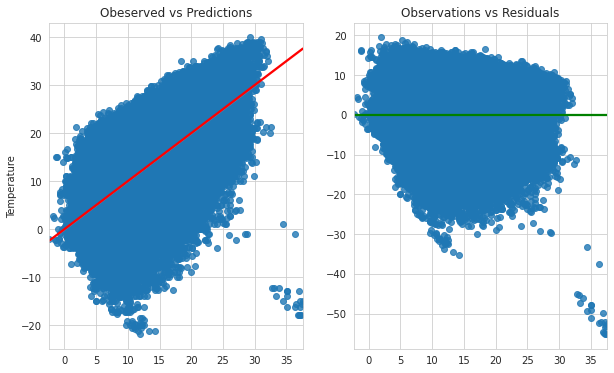

In [ ]:
predictions=results.predict()
residuals=results.resid

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.regplot(x=predictions,y=target,line_kws={"color":"red"})  #lowess=True,
plt.title("Obeserved vs Predictions")

plt.subplot(1,2,2)
sns.regplot(x=predictions,y=residuals, line_kws={"color":"green"})  #,lowess=True,
plt.title("Observations vs Residuals")

plt.show()

As shown in the plot, there is a linear relation between coefficient and target.
This assumption is provided by the model.

**2- THE ERROR TERMS SHOULD BE ZERO IN AVARAGE** 

  To check this assumption we calculate Errors be subtructing predictions from input target variable values.

In [ ]:
errors= target-predictions

print("Errors mean :{}".format(np.mean(errors)))


Errors mean :1.1111075473075274e-11


Since error value is very small and close to zero this assumption is provided.

**3- HOMOSCEDASTICITY** ( Errors variance should not change systematicaly across observations) 

To view if the model fits this condition I will plot predictions with errors in same scatter plot.*italicised text*

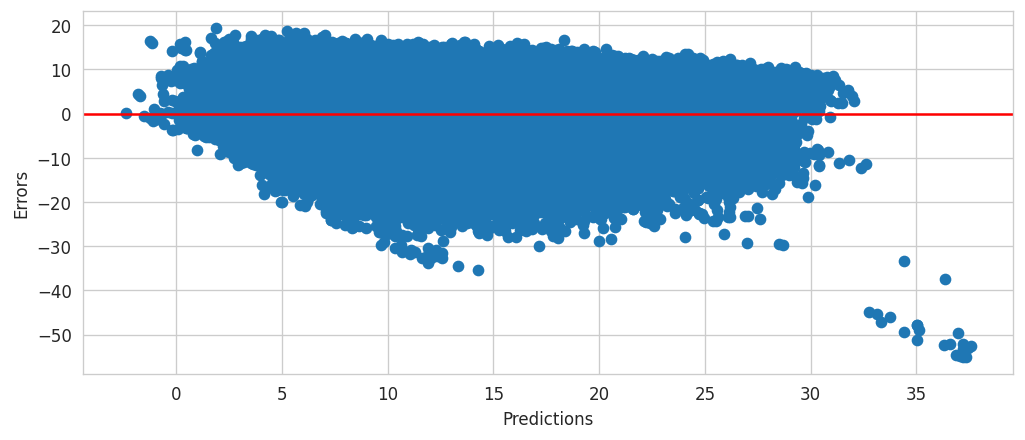

In [ ]:
plt.figure(figsize=(10,4),dpi=120)
plt.scatter(predictions,errors)
plt.xlabel("Predictions")
plt.ylabel("Errors")
plt.axhline(0,color="red")
plt.show()

As in the plot there is a systematic change in errors variance by predictions.
This condition is not provided.
Also I will apply two test from python libraries to be sure.

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bartstats=bartlett(predictions,errors)
levenestats=levene(predictions,errors)

print("H0 =>  ""ERRORS ARE HOMOSCEDASTIC """)
print(" bartlett test  stat value t: {:3g}  and  p value is {:.3g}".format(bartstats[0],bartstats[1]))
print(" levene test  stat value t: {:3g}  and  p value is {:.3g}".format(levenestats[0],levenestats[1]))

H0 =>  ERRORS ARE HOMOSCEDASTIC 
 bartlett test  stat value t: 2464.84  and  p value is 0
 levene test  stat value t: 2321.24  and  p value is 0


As the p value of the tests are lower than 0.5. H0 is rejected and the model is not homoscedastic (heteroscedastic) 

The reasons for our model not providing this condition; 
  1- We might not used all important features.
  2- Outliers if exists. 

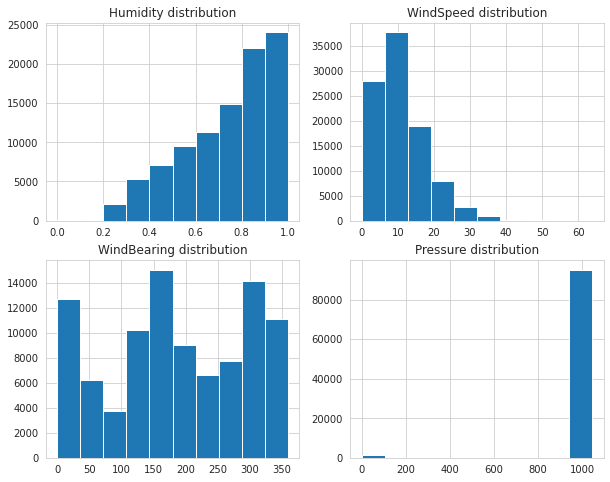

In [ ]:

p=1
plt.figure(figsize=(10,8))

#features.columns

for col in features.columns:
  if col=="const":
    continue

  plt.subplot(2,2,p)
  plt.title("{} distribution".format(col))
  plt.hist(features[col])
  #plt.violinplot(features[col],showmeans=True,showmedians=True,showextrema=True)
  p+=1

plt.show()

**4- LOW MULTICOLLINEARITY**

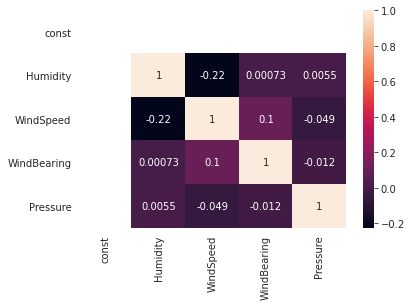

In [ ]:
corr=features.corr()
sns.heatmap(corr,annot=True)

We checked the correlation between features. Features used in the model have very weak correlation with each other. 
 This condition is provided.

We can also detect multicorrelation between features by using VIF (Variance Inflation Factor). If any feature is correlated then all VIF values will be 1. 

In [ ]:
ftr=features.columns.tolist()
ftr.remove("const")
ftr

['Humidity', 'WindSpeed', 'WindBearing', 'Pressure']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=ftr).T

,Humidity,WindSpeed,WindBearing,Pressure
vif,1.053985,1.06793,1.011563,1.002508


VIF for each feature is close to 1. So multicorrelation is not problem for this model.

**5- ERROR TERMS SHOULD BE UNCORRELATED WITH EACH OTHER.**

We can view correlation of error terms by ploting and using python library.

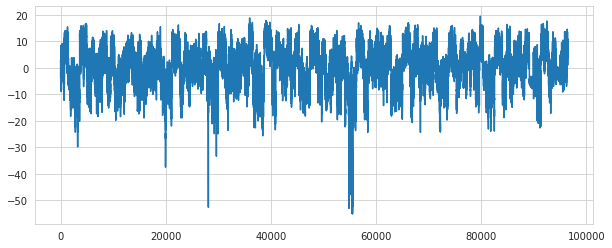

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(errors)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


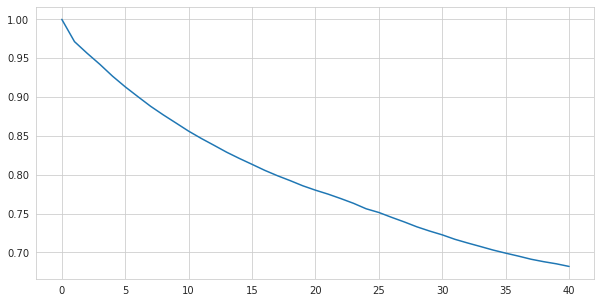

In [ ]:
#acf : auto_correlation_function

from statsmodels.tsa.stattools import acf

acf_data=acf(errors)

plt.figure(figsize=(10,5))
plt.plot(acf_data)

plt.show()

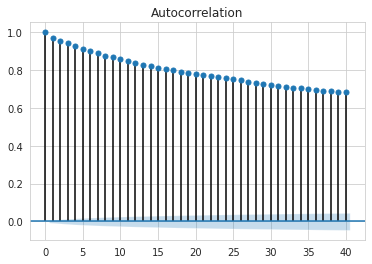

In [ ]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residuals, lags=40 , alpha=0.05)
acf.show()

**6- ERRORS AND FEATURES SHOULD NOT BE CORRELATED**

I will use pearsonr  method from statsmodel library to find correlation coefficient between each feature and errors(residuals)

In [ ]:
from scipy.stats.stats import pearsonr

for col in features.columns:
  if col=="const":
    continue
  corrtest=pearsonr(features[col],residuals)
  print("Feature:{} - correlation:{:.4f} - p-value : {:.4f}".format(col,corrtest[0],corrtest[1]))


Feature:Humidity - correlation:0.0000 - p-value : 1.0000
Feature:WindSpeed - correlation:-0.0000 - p-value : 1.0000
Feature:WindBearing - correlation:-0.0000 - p-value : 1.0000
Feature:Pressure - correlation:-0.0000 - p-value : 1.0000


Because p values are bigger den 0.05 and null hypotesis for this test is "There is no correlation", we can say;   All collumns are correlated with residuals. Thus, model doesnt provide this assumption.